Epoch 1/50


2025-01-18 00:27:49.196539: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 325739.0938 - mae: 261.8583 - val_loss: 342393.4375 - val_mae: 326.1933
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 341802.4062 - mae: 257.7476 - val_loss: 342372.3438 - val_mae: 326.1612
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 248201.8125 - mae: 211.6716 - val_loss: 342346.9375 - val_mae: 326.1224
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 401846.7188 - mae: 283.7544 - val_loss: 342313.5625 - val_mae: 326.0716
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 378993.0625 - mae: 292.5947 - val_loss: 342269.5625 - val_mae: 326.0045
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 341242.6250 - mae: 271.9720 - val_loss: 342208.5000 - val_mae: 325.9114
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 283507.0938 - mae: 230.1141 - val_loss: 342123.0000 - val_mae: 325.7810
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 245620.4375 - mae: 228.8906 - val_loss: 342003.812

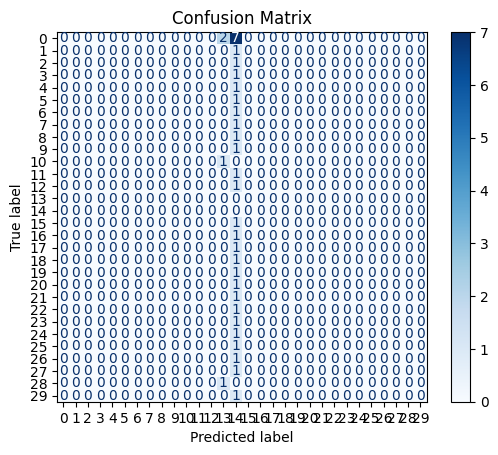

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       9.0
           2       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          62       0.00      0.00      0.00       1.0
          70       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       0.0
          82       0.00      0.00      0.00       0.0
          95       0.00      0.00      0.00       1.0
         109       0.00      0.00      0.00       1.0
         145       0.00    

/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load Data
df = pd.read_csv('../data/us_disaster_declarations.csv')

# Convert date to datetime and extract month
df['date'] = pd.to_datetime(df['declaration_date'], errors='coerce')
df['month'] = df['date'].dt.month

# Group by disaster type and month
monthly_aggregated = df.groupby(['month', 'incident_type']).size().reset_index(name='count')

# Encode incident types
label_encoder = LabelEncoder()
monthly_aggregated['incident_type_encoded'] = label_encoder.fit_transform(monthly_aggregated['incident_type'])

# Prepare Features and Target
X = monthly_aggregated[['month', 'incident_type_encoded']]
y = monthly_aggregated['count']

# Scale Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

# Build LSTM Model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train Model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    np.expand_dims(X_train, axis=2),
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

# Predictions
y_pred = model.predict(np.expand_dims(X_test, axis=2))

# Evaluate with Confusion Matrix
# Discretize predictions for confusion matrix
y_pred_class = np.round(y_pred).astype(int)
y_test_class = np.round(y_test).astype(int)

conf_matrix = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test_class, y_pred_class))

